# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

In [1]:
%pwd

'/home/carnd/final'

---
## Step 0: Load The Data

In [2]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'traffic-signs-data/train.p'
testing_file = 'traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)


X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']
print("Data Loaded...")

Data Loaded...


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [3]:
import numpy as np
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = len(X_train)#39209

# TODO: Number of testing examples.
n_test = len(X_test)#12630

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape #'32x32x3'

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

In [4]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import random
# Visualizations will be shown in the notebook.
%matplotlib inline

### Plot Training Dataset vs Test Dataset

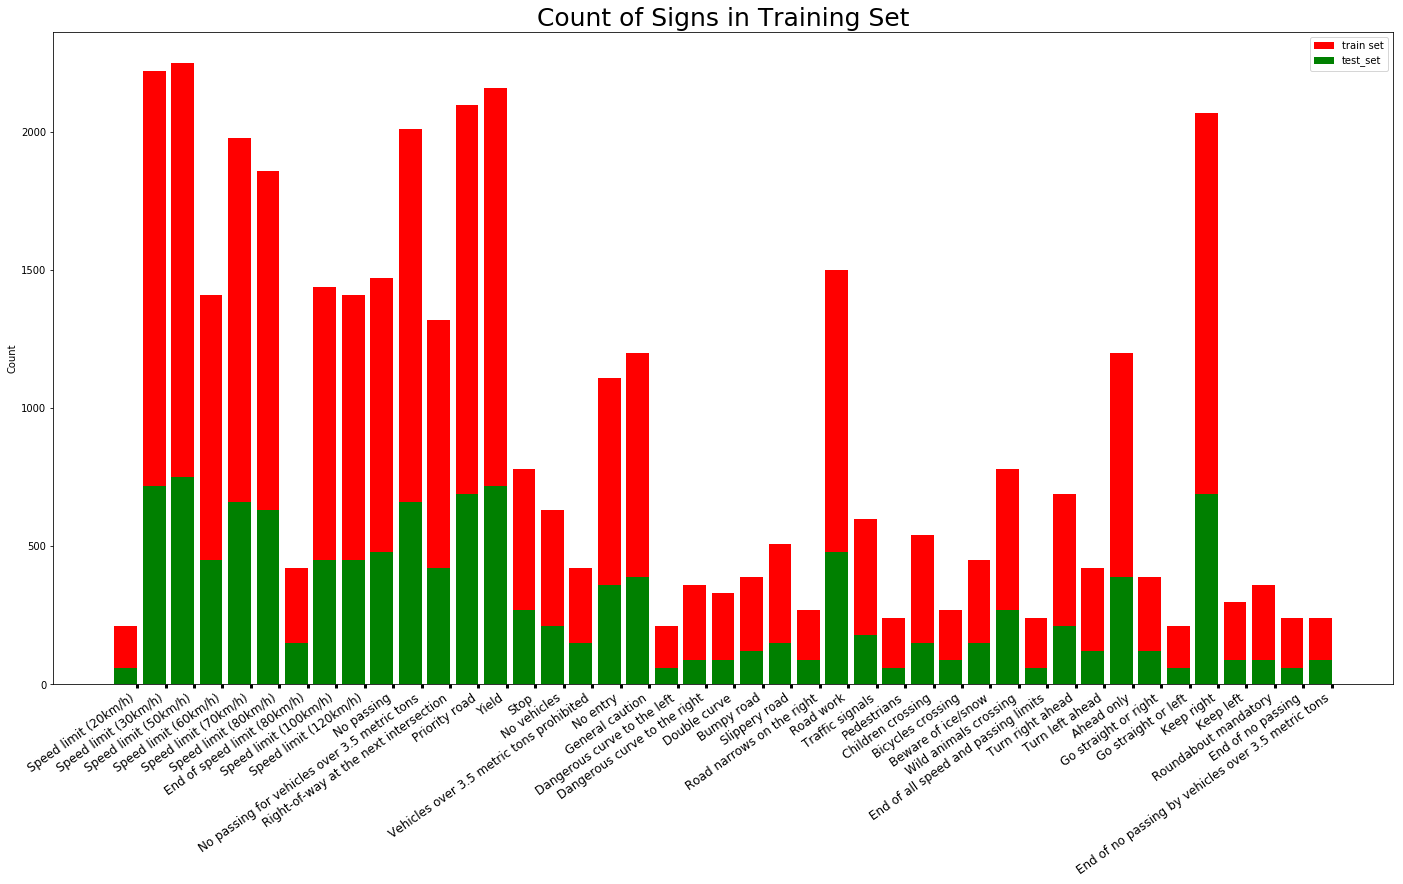

In [5]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import random
# Visualizations will be shown in the notebook.
%matplotlib inline

# Example data
sign, counts = np.unique(y_train, return_counts = True)
test_sign, test_counts = np.unique(y_test, return_counts = True)
sign_values = np.genfromtxt('signnames.txt',  dtype='U', delimiter=',' , skip_header =1)
#print(sign.shape)
sign_names = sign_values[:,1]
#print(len(sign), len(counts))


fig, ax = plt.subplots(figsize = (24, 12))
plt.bar(sign, counts, color = 'r', label = 'train set')
plt.bar(test_sign, test_counts, color = 'g', label = 'test_set')
plt.xticks(np.arange(43) + 0.4 , sign_names, rotation='35', fontsize = 12, ha = 'right')
#plt.xticks(np.arange(43) + 0.4 , [sign_name[i] for i in range(43)], rotation='35', fontsize = 12, ha = 'right')
ax.xaxis.set_tick_params(width=3)
ax.set_title('Count of Signs in Training Set', fontsize = 25)
#ax.set_yticks(y_pos)
ax.set_ylabel('Count')
#ax.invert_yaxis()  # labels read top-to-bottom
plt.legend();
plt.show()

### Randomly Show Traffic Sign for all Classes from the Dataset

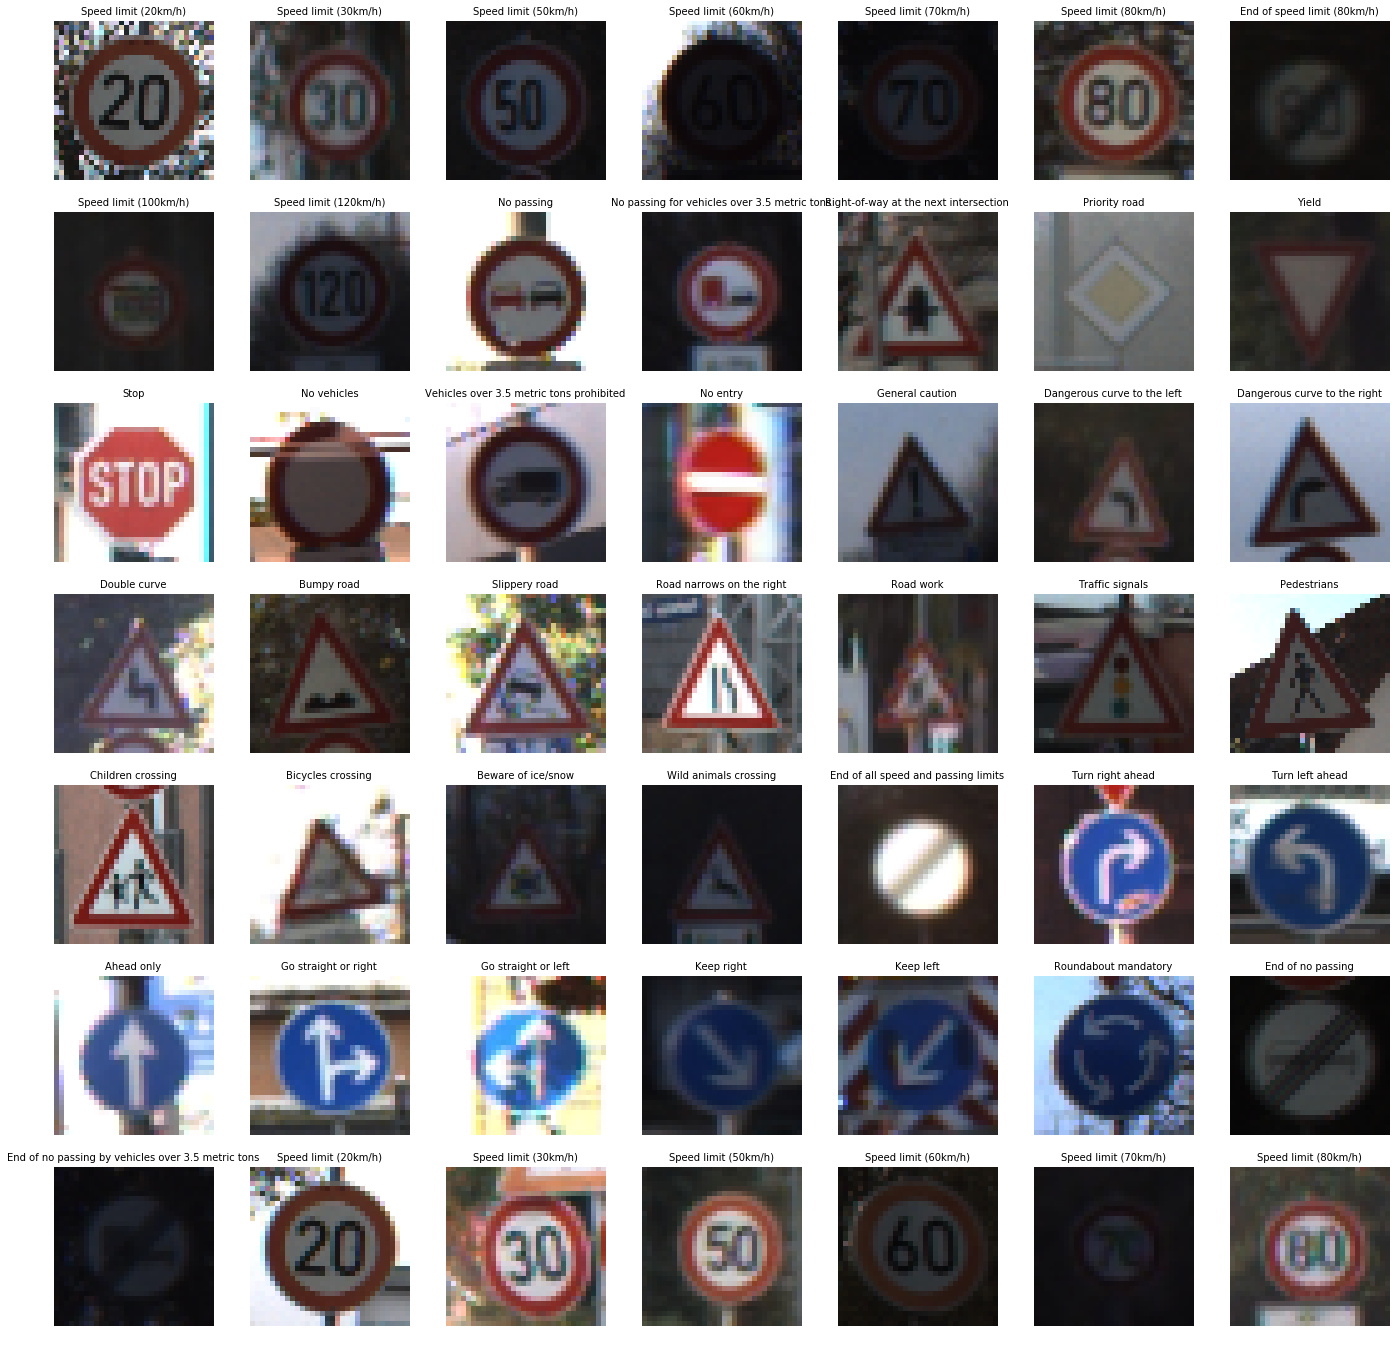

In [6]:
# Randomly choose and plot traffic sign images
fig, axes = plt.subplots(7,7, figsize = (24, 24))
plt.axis('off')
for i in range(49):
    #print(np.where(y_train==(i%43))[0])
    index = np.random.choice(np.where(y_train==(i%43))[0])
    #index = np.random.choice(indices_of_label[i%43])
    axes.flat[i].imshow(X_train[index])
    axes.flat[i].set_title(sign_names[i%43], fontsize = 10)
    axes.flat[i].axis('off')


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

### Image Pre-Processing

In [7]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.
import numpy as np

def image_normalize(X_train, y_train):
    """Apply preprocessing to make every pixel value to range between 0-1"""

    new = X_train[0:2]
    newy = y_train[0:2]
    for offset in range(0, len(X_train), 500):
        #batch_x, batch_y = (X_train[offset:offset+500]-128)/128, y_train[offset:offset+500]
        batch_x, batch_y = X_train[offset:offset+500]/255, y_train[offset:offset+500]
        new = np.append(new, batch_x, axis=0)
        newy = np.append(newy, batch_y, axis=0)
        #total_accuracy += (accuracy * len(batch_x))
    #print(new.shape, newy.shape)
    X_train, y_train = new[2:], newy[2:]
    #print(X_train.shape, y_train.shape)
    return X_train, y_train 

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**
   * Preprocessing Used: The model worked best when used pixel data that was scaled between value 0-1 by dividing all image pixel value by/255. 
   * Normalization by subtracting 128 and dividing the pixel value by 128 didn’t work as expected for reasons that I don't yet understand. Normalization is supposed to provide with better convex optimization problem if I understand it right.
   * Grayscale Not used as color information is important while recognizing traffic signs and color carry information. 

In [8]:
### Generate additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

## Data Augmentation - Generating Additional Data

### Generate Different Angle Rotation Image - 1 Variations per Original Image

In [9]:
#Define the Jittering Data Generator
import cv2

def transform_image(img,ang_range,shear_range,trans_range):
    '''
    This function transforms images to generate new images.
    The function takes in following arguments,
    1- Image
    2- ang_range: Range of angles for rotation
    3- shear_range: Range of values to apply affine transform to
    4- trans_range: Range of values to apply translations over. 
    
    A Random uniform distribution is used to generate different parameters for transformation
    
    '''
    # Rotation

    ang_rot = np.random.uniform(ang_range)-ang_range/2
    rows,cols,ch = img.shape    
    Rot_M = cv2.getRotationMatrix2D((cols/2,rows/2),ang_rot,1)

    # Translation
    tr_x = trans_range*np.random.uniform()-trans_range/2
    tr_y = trans_range*np.random.uniform()-trans_range/2
    Trans_M = np.float32([[1,0,tr_x],[0,1,tr_y]])

    # Shear
    pts1 = np.float32([[5,5],[20,5],[5,20]])

    pt1 = 5+shear_range*np.random.uniform()-shear_range/2
    pt2 = 20+shear_range*np.random.uniform()-shear_range/2

    pts2 = np.float32([[pt1,5],[pt2,pt1],[5,pt2]])

    shear_M = cv2.getAffineTransform(pts1,pts2)
        
    img = cv2.warpAffine(img,Rot_M,(cols,rows))
    img = cv2.warpAffine(img,Trans_M,(cols,rows))
    img = cv2.warpAffine(img,shear_M,(cols,rows))
    
    return img


def jitter_data(X_train, y_train):
    
    #Placeholder for the new set of images
    new_X_train = X_train[0:2]
    new_y_train = y_train[0:2]
    
    len_train = len(np.unique(y_train))
        
    
    for i in range(len_train):
        if len(y_train[np.where(y_train==i)]) < 800:
            X_jitter = X_train[np.where(y_train==i)]
            y_jitter = y_train[np.where(y_train==i)]
                        
            #for j in range(2):
            img = np.array([transform_image(test,50,5,5) for test in X_jitter]) 
            new_X_train = np.append(new_X_train, img, axis=0)
            new_y_train = np.append(new_y_train, y_jitter, axis=0)
            
        else:
            X_jitter = X_train[np.where(y_train==i)]
            y_jitter = y_train[np.where(y_train==i)]
            
            #print(len(X_canny))
            X_jitter = X_jitter[:int(len(X_jitter)*0.6)]
            y_jitter = y_jitter[:int(len(y_jitter)*0.6)]
            
            #print(len(X_canny))
            #for j in range(2):
            img = np.array([transform_image(test,50,5,5) for test in X_jitter]) 
            new_X_train = np.append(new_X_train, img, axis=0)
            new_y_train = np.append(new_y_train, y_jitter, axis=0)
            
    return new_X_train, new_y_train

In [10]:
### Generate the New Training Set
#Dummy Array to store jittered image
X_train_1, y_train_1 = X_train[0:2], y_train[0:2]

#Generate Jittered Image
X_train_2, y_train_2 = jitter_data(X_train, y_train)
#print(X_train_2.shape, y_train_2.shape)


new_X_train = np.append(X_train_1, X_train_2, axis=0)
new_y_train = np.append(y_train_1, y_train_2, axis=0)
print(new_X_train.shape, new_y_train.shape)

new_X_train = np.append(new_X_train, X_train, axis=0)
new_y_train = np.append(new_y_train, y_train, axis=0)
#print(new_X_train.shape, new_y_train.shape)



(27729, 32, 32, 3) (27729,)


In [11]:
#Shape of new Data Set after Data Augmentation
print("Shape of new data set after data augmentation")
print(new_X_train.shape, new_y_train.shape)
#print(X_train.shape, y_train.shape)

Shape of new data set after data augmentation
(66938, 32, 32, 3) (66938,)


### Plotting Randomly Rotated Image - Part of Augmented DataSet

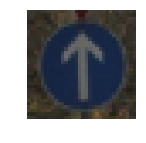

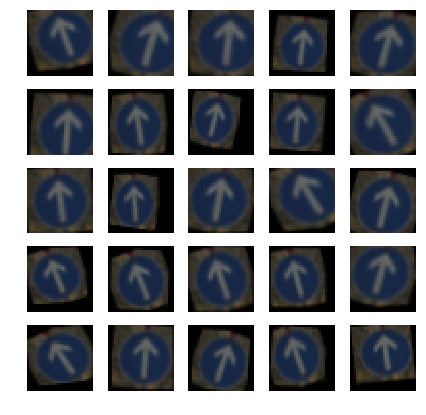

In [12]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import random
%matplotlib inline


image = X_train[35000]
plt.figure(figsize=(2,2))
plt.imshow(image);
plt.axis('off');
plt.show()

gs1 = gridspec.GridSpec(5, 5)
gs1.update(wspace=0.01, hspace=0.02) # set the spacing between axes. 
plt.figure(figsize=(7,7))
for i in range(25):
    ax1 = plt.subplot(gs1[i])
    ax1.set_xticklabels([])
    ax1.set_yticklabels([])
    ax1.set_aspect('equal')
    img = transform_image(image,50,5,5)

    plt.subplot(5,5,i+1)
    plt.imshow(img)
    plt.axis('off')

plt.show()


### Image Padding to Reduce Loss While Using Max Pooling

In [13]:
import numpy as np
#Image Padding with Pad =2

def imgpad(img):
    """Pad the image with 2 pixels"""
    img = np.pad(img, ((0,0),(2,2),(2,2),(0,0)), 'constant')
    return img

In [14]:
#New Data Set with Padding
#new_X_train = imgpad(new_X_train)
new_X_train = imgpad(new_X_train)
print("Data set shape after image padding with pad=2")
print(new_X_train.shape,new_X_train.shape)

Data set shape after image padding with pad=2
(66938, 36, 36, 3) (66938, 36, 36, 3)


### Training and Validation Set Split

In [15]:
#Training and Validation Set Split
import numpy as np
from sklearn.model_selection import train_test_split

print("The Training and Validation set split using the data set Size of {}".format(len(new_X_train)))
X_train, X_validation, y_train, y_validation = train_test_split(new_X_train, new_y_train, test_size=0.25, random_state=42)

#print("The Training and Validation set split using the data set Size of {}".format(len(X_train)))
#X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.20, random_state=42)

The Training and Validation set split using the data set Size of 66938


In [16]:
print("The size of new training and validation set")
print(X_train.shape, X_validation.shape, y_train.shape, y_validation.shape)

The size of new training and validation set
(50203, 36, 36, 3) (16735, 36, 36, 3) (50203,) (16735,)


### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**
   * I have used the cv2.getRotationMatrix2D function to genreate images with random rotation so that the model can recognize traffic signs that may be slighty tilted in real world. Though I am not convinced that this model is good enough as a practical model. 
   * The CNN Model Performed better **without Augmented Data giving Validation Accuracy: 99.5%, Training Loss: 0, Test Accuracy: 95.3%**. But this model may not work accurately in real world.
   * With the tilted images in the training set the model should work to identity traffic signs that may not be standing straight. 

In [17]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

### Modified VGGNet - 8 Weight Layers
   1. Layer 1: Convolutional. Input = 36x36x3. Use a 3x3 filter with stride=1 to Output = 34x34x64.
   2. Apply relu activation function
   3. Layer 2: Convolutional. Input is a 34x34x64, Use filter 3x3 with Stride=1, Output = 32x32x64.
   4. Apply relu activation function
   5. Pooling. Input = 32x32x64. Kernel size of 2x2 with Stride=2 Output = 16x16x64
   6. Layer 3: Convolutional. Input = 16x16x64. Filter 3x3 with Stride=1 Output = 14x14x128.
   7. Apply relu activation function
   8. Layer 4: Convolutional. Input = 14x14x128. Filter 3x3 with Stride=1 Output = 12x12x256.
   9. Apply relu activation function
   10. Layer 5: Convolutional. Input = 12x12x256. Filter 3x3 with Stride=1 Output = 10x10x512.
   11. Apply relu activation function
   12. Pooling. Input = 10x10x512. Kernel size of 2x2 with Stride=2 Output = 5x5x512
   13. Layer 6: Fully Connected. Input = 12800. Output = 4096.
   14. Apply relu activation function
   15. Regularization - Drop out Keep Probablity 50%
   16. Layer 7: Fully Connected. Input = 4096. Output = 1024.
   17. Apply relu activation function
   18. Regularization - Drop out Keep Probablity 50%
   19. Layer 8: Fully Connected. Input = 1024. logits = 43.

In [18]:
%%html
<img src="Architecture.jpg"/>

In [19]:
import tensorflow as tf
import numpy as np
from tensorflow.contrib.layers import flatten

def VGGNet(x, keep_prob):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0.0
    sigma = 0.1
    
    image_width = 36
    image_height = 36
    color_channels = 3
    filter_size_width = 3
    filter_size_height = 3
    k_output = 64
    
    
    #Layer 1: Convolutional. Input = 36x36x3. Use a 3x3 filter with stride=1 to Output = 34x34x64.
    #weights and biases
    weight = tf.Variable(tf.truncated_normal([filter_size_width, filter_size_height, color_channels, k_output], mean= mu, stddev=sigma), name='weight')
    bias = tf.Variable(tf.zeros(k_output), name='bias')    
    conv_layer1 = tf.nn.conv2d(x, weight, strides=[1, 1, 1, 1], padding='VALID')
    
    # Add bias
    conv_layer1 = tf.nn.bias_add(conv_layer1, bias)
   
    # Apply activation function
    conv_layer1 = tf.nn.relu(conv_layer1)
    #print(conv_layer1.get_shape())

    #No pooling
    
    #Layer 2: Convolutional. Input is a 34x34x64, Use filter 3x3 with Stride=1, Output = 32x32x64.
    weight2 = tf.Variable(tf.truncated_normal([3, 3, 64, 64], mean=mu, stddev=sigma), name='weight2')
    bias2 = tf.Variable(tf.zeros(64), name='bias2')
    conv_layer2 = tf.nn.conv2d(conv_layer1, weight2, strides=[1, 1, 1, 1], padding='VALID')
    
    # Add bias
    conv_layer2 = tf.nn.bias_add(conv_layer2, bias2)
    
    # Apply activation function
    conv_layer2 = tf.nn.relu(conv_layer2)
    #print("After L2 {}".format(conv_layer2.get_shape()))
    
       

    
    #Pooling. Input = 32x32x64. Kernel size of 2x2 with Stride=2 Output = 16x16x64
    conv_layer2 = tf.nn.max_pool(conv_layer2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    #print("After L2 pooling {}".format(conv_layer2.get_shape()))
    
           
    
    # Layer 3: Convolutional. Input = 16x16x64. Filter 3x3 with Stride=1 Output = 14x14x128.
    weight3 = tf.Variable(tf.truncated_normal([3, 3, 64, 128], mean = mu, stddev = sigma), name='weight3')
    bias3 = tf.Variable(tf.zeros(128), name='bias3')
    conv_layer3   = tf.nn.conv2d(conv_layer2, weight3, strides=[1, 1, 1, 1], padding='VALID') 
    # Add bias
    conv_layer3 = tf.nn.bias_add(conv_layer3, bias3)
    
    
    # Apply activation function
    conv_layer3 = tf.nn.relu(conv_layer3)
    
    
    
    # Layer 4: Convolutional. Input = 14x14x128. Filter 3x3 with Stride=1 Output = 12x12x256.
    weight4 = tf.Variable(tf.truncated_normal([3, 3, 128, 256], mean = mu, stddev = sigma), name='weight4')
    bias4 = tf.Variable(tf.zeros(256), name='bias4')
    conv_layer4   = tf.nn.conv2d(conv_layer3, weight4, strides=[1, 1, 1, 1], padding='VALID')
    # Add bias
    conv_layer4 = tf.nn.bias_add(conv_layer4, bias4)
    
    # Apply activation function
    conv_layer4 = tf.nn.relu(conv_layer4)
    
    # Layer 5: Convolutional. Input = 12x12x256. Filter 3x3 with Stride=1 Output = 10x10x512.
    weight5 = tf.Variable(tf.truncated_normal([3, 3, 256, 512], mean = mu, stddev = sigma), name='weight5')
    bias5 = tf.Variable(tf.zeros(512), name='bias5')
    conv_layer5   = tf.nn.conv2d(conv_layer4, weight5, strides=[1, 1, 1, 1], padding='VALID')
    # Add bias
    conv_layer5 = tf.nn.bias_add(conv_layer5, bias5)
    
    
    # Apply activation function
    conv_layer5 = tf.nn.relu(conv_layer5)
    
    # Pooling. Input = 10x10x512. Kernel size of 2x2 with Stride=2 Output = 5x5x512
    conv_layer5 = tf.nn.max_pool(conv_layer5, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    #print("After L2 pooling {}".format(conv_layer4.get_shape()))
    

    # Flatten. Input = 5x5x512. Output = 12800.
    fc0   = flatten(conv_layer5)
    #print(fc0.get_shape())
    
    # Layer 6: Fully Connected. Input = 12800. Output = 4096.
    fc1_weight = tf.Variable(tf.truncated_normal([12800, 4096], mean=mu, stddev=sigma), name='fc1_weight')
    fc1_bias = tf.Variable(tf.zeros(4096), name='fc1_bias')
    
    fc1 = tf.add(tf.matmul(fc0, fc1_weight), fc1_bias)
        
    # Activation.    
    fc1 = tf.nn.relu(fc1)
    
    #Apply regularization
    #keep_prob = 0.5 # probability to keep units
    fc1 = tf.nn.dropout(fc1, keep_prob)


    # Layer 7: Fully Connected. Input = 4096. Output = 1024.
    fc2_weight = tf.Variable(tf.truncated_normal([4096, 1024], mean=mu, stddev=sigma), name='fc2_weight')    
    fc2_bias = tf.Variable(tf.zeros(1024), name='fc2_bias')
    
    fc2 = tf.add(tf.matmul(fc1, fc2_weight), fc2_bias)
        
    # Activation.
    fc2 = tf.nn.relu(fc2)
    
    #Apply regularization
    
    fc2 = tf.nn.dropout(fc2, keep_prob) 

    #Layer 8: Fully Connected. Input = 1024. Output = 43.
    fc3_weight = tf.Variable(tf.truncated_normal([1024, 43], mean=mu, stddev=sigma), name='fc3_weight')
    fc3_bias = tf.Variable(tf.zeros(43), name='fc3_bias')
    
    logits = tf.add(tf.matmul(fc2, fc3_weight), fc3_bias)        
  
    return logits

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

In [20]:
### Train your model here.
### Feel free to use as many code cells as needed.

### Call Image Preprocessing on Train, Validation and Test Set

In [21]:
#Preprocess the image data to train the Convolutional Neural Network

X_train1, y_train1= image_normalize(X_train, y_train)
print(X_train1.shape, y_train1.shape)
#X_validation, y_validation = X_train[100:150], y_train[100:150]
X_validation, y_validation = image_normalize(X_validation, y_validation)
print(X_validation.shape, y_validation.shape)

(50203, 36, 36, 3) (50203,)
(16735, 36, 36, 3) (16735,)


In [22]:
print(X_train1.shape, y_train1.shape)
print(X_validation.shape, y_validation.shape)

(50203, 36, 36, 3) (50203,)
(16735, 36, 36, 3) (16735,)


In [23]:
#Pad test data
X_test = imgpad(X_test)
print(X_test.shape)

(12630, 36, 36, 3)


In [24]:
#Pre-process test image
X_test, y_test= image_normalize(X_test, y_test)

In [25]:
print(X_test.shape)

(12630, 36, 36, 3)


In [26]:
### Training Pipeline and Model Evaluation

In [27]:
import tensorflow as tf
from sklearn.utils import shuffle

x = tf.placeholder(tf.float32, (None, 36, 36, 3)) #Change Code Here
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32)
one_hot_y = tf.one_hot(y, 43) #One_hot encoding the class labels
    

#Traninig Pipeline
EPOCHS = 50
BATCH_SIZE = 512
rate = 0.003 #Choose the learning rate
#keep_prob = 1.0 #Training Probability 0.5, Test Keep Probablity 1.0


In [28]:
#logits = LeNet(x)
logits = VGGNet(x, keep_prob)  #Change code here
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

#Model Evaluation
#Evaluate how well the loss and accuracy of the model for a given dataset.

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [29]:
def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

### TensforFlow Code to Train the Model

In [30]:
import tensorflow as tf
from sklearn.utils import shuffle

#Save Variable
saver = tf.train.Saver()

#Train the Model
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train1) #Change Code here as well
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train1, y_train1)#Change the code here
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            _, loss = sess.run([training_operation, loss_operation], feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print("Traning Loss = {:.3f}".format(loss))
        print()
        
    saver.save(sess, './testModel02') #VGGNet
    print("Model saved")


Training...

EPOCH 1 ...
Validation Accuracy = 0.557
Traning Loss = 1.475

EPOCH 2 ...
Validation Accuracy = 0.843
Traning Loss = 0.988

EPOCH 3 ...
Validation Accuracy = 0.907
Traning Loss = 0.238

EPOCH 4 ...
Validation Accuracy = 0.935
Traning Loss = 0.456

EPOCH 5 ...
Validation Accuracy = 0.943
Traning Loss = 0.140

EPOCH 6 ...
Validation Accuracy = 0.953
Traning Loss = 0.135

EPOCH 7 ...
Validation Accuracy = 0.962
Traning Loss = 0.172

EPOCH 8 ...
Validation Accuracy = 0.963
Traning Loss = 0.050

EPOCH 9 ...
Validation Accuracy = 0.969
Traning Loss = 0.202

EPOCH 10 ...
Validation Accuracy = 0.973
Traning Loss = 0.012

EPOCH 11 ...
Validation Accuracy = 0.971
Traning Loss = 0.017

EPOCH 12 ...
Validation Accuracy = 0.974
Traning Loss = 0.000

EPOCH 13 ...
Validation Accuracy = 0.967
Traning Loss = 0.024

EPOCH 14 ...
Validation Accuracy = 0.975
Traning Loss = 0.044

EPOCH 15 ...
Validation Accuracy = 0.969
Traning Loss = 0.028

EPOCH 16 ...
Validation Accuracy = 0.975
Traning Lo

#### Validation Accuracy - 98.1% With Loss - 0.001

## Evaluate the Model Using Test Data

In [31]:
print(X_test.shape, y_test.shape)

(12630, 36, 36, 3) (12630,)


In [32]:
with tf.Session() as sess:
    #sess.run(tf.global_variables_initializer())
    #saver = tf.train.import_meta_graph('./testModel02.meta')
    #saver.restore(sess, "./testModel02")
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test) #Change Keep Probablity to 1.0, No dropout required for prediction
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.973


#### Test Accuracy - 97.3%

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**
   * I have used the AdamOptimizer which is an advanced optimizer, and looks to converge faster to the minimum than the other optimizers like Stochastic Gradient Descent, Momentum, Adagrad etc. 
   * Batch Size: 512 - Reason: I tried to use the bigger batch sizes of 1024 and 2048 but it gave me an insufficient memory error on AWS instance. The batch size that look like worked is 512. If the batch size was bigger it could have helped given that data for each class was not equal. So while shuffling the training data there are high chances of missing out lesser representative classes while forming batches to train. 
   * Epoch Size: 50 - Reason: Smaller epoch sizes didn’t seem to work well as the epoch size of 50 seems to help us converge to a minimum, and with low training loss. Also higher epoch size may increase the chances of training all the data from the train set.
   * Dropout Regularization: 0.5 Keep probability - Reason: 0.5 Dropout regularization, randomly drops 50% of the nodes from fully connected layers 1 and 2 in the architecture. This should help us reduce overfitting and make the model generalize to a good extent.
   * Learning Rate - 0.003, Reason: Whenever I tried to increase the learning rate to faster train the model, the model accuracy dropped. 0.001 worked ok, 0.01 worked worst. So 0.003 helped me get a better training loss and convergence.

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**
    * I first started with a LeNet Architecture but it did not seem to fit the data well
    * Then based on the CS231n Course, VGGNet was a plausible candidate for the Architecture, but since the images were a 32x32x3 instead of a 227x227x3. I had to cutomize the model to be less deep to 8 layers for an 32x32x3 image data. With padding the input to 36x36x3.
    * The Convolution filter was 3x3 with Stride 1 instead of bigger kernel like 5x5 or a 7x7, as the smaller convolutions is supposed to preserve the learning information in the first CNN layer without much loss of information. 
    * I guess for any problem VGGNet can be a decent approach to image classification as of now, with the draw back being the number of parameters or weights to be trained are very high.

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**
   * I have used random traffic sign images from the internet, which are at random angles, different view, different colors etc. 
   * Some sign image are not the center of the image and I could the model failing to classify those images.
   * Two sign Images together, Model failed to classify.
   * Astonishly, the model failed to classify 50 Km/h images. May be because of the color information. Not sure though. 
   * The images are deliberately chosen to be difficult to classify and hence the Model only gave an Accuracy of 22.2%

In [33]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

### Plotting New Images - 6 Different Classes, 3 Each

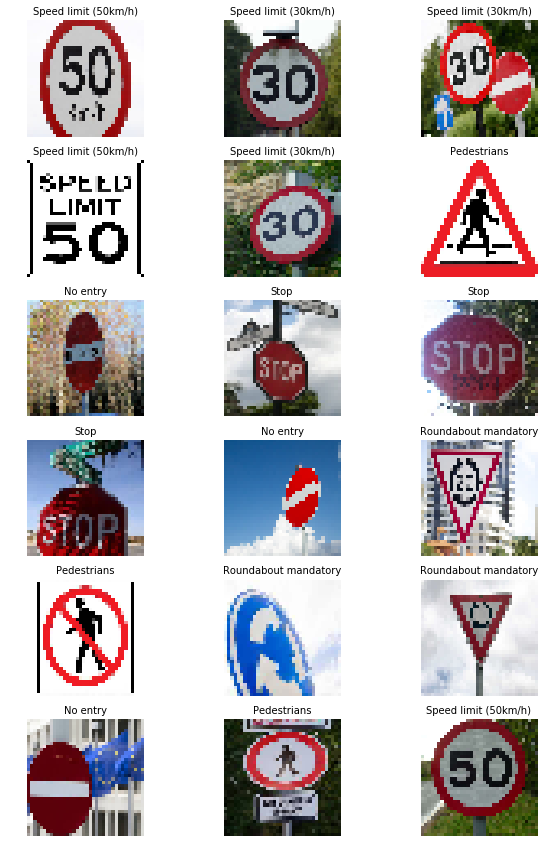

In [34]:
import cv2
import glob
import matplotlib.image as mpimg

image_list = []
image_list_y = []

files = glob.glob('./new_sign/*.*')
fig, axes = plt.subplots(6, 3, figsize = (10,15))
for i, file in enumerate(files):
    #img = mpimg.imread(file)
    img = cv2.imread(file)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    #print(img.shape)
    img = cv2.resize(img,(36,36))
    image_list.append(img)
    image_list_y.append(int(file[11:13]))
    #new_test_img = np.append(new_test_img, img, axis=0)
    #print(img.shape)
    #img = img.reshape(32,32,3)
    axes.flat[i].imshow(img)
    axes.flat[i].set_title(sign_names[image_list_y[i]], fontsize = 10)
    axes.flat[i].axis('off')

#Store the new images in a numpy array
image_list = np.array(image_list)
#image_list_y = list(map(int, image_list_y))
image_list_y = np.array(image_list_y)
#print(image_list.shape)
#print(image_list_y)

In [35]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

### Pre-process new test image

In [36]:
#Pre-process new test image
new_X_test, new_y_test= image_normalize(image_list, image_list_y)

### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**
   * The model is only 22.22% accurate, because it has not been trained to work on different color images, the model is specific to German traffic signs.
   * The Model cannot localize and detect images. 
   * The Model also cannot classify sign images that are not centered

In [42]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

### Test for Accuracy on New Images

In [37]:
#Test for Accuracy on the accquired Images
#tf.reset_default_graph()

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    new_test_accuracy = evaluate(new_X_test, new_y_test)
    print("Test Accuracy on New Images from the Web = {:4.2f}%".format(100. * new_test_accuracy))

Test Accuracy on New Images from the Web = 22.22%


#### Test Accuracy on New Images - 22.22%

### Calculate the Score and Top 5 Softmax Probability

In [38]:
#Softmax Score and Probablities
softmax_score = tf.nn.softmax(logits)
top_k = tf.nn.top_k(softmax_score, k=5)

#get softmaxscore
#tf.reset_default_graph()

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    softmax_score_value, top_k_predict = sess.run([softmax_score, top_k], feed_dict = {x: new_X_test, keep_prob: 1.0})

In [39]:
print(softmax_score_value.shape, top_k_predict[0].shape)

(18, 43) (18, 5)


### Visualize Top 5 Prediction

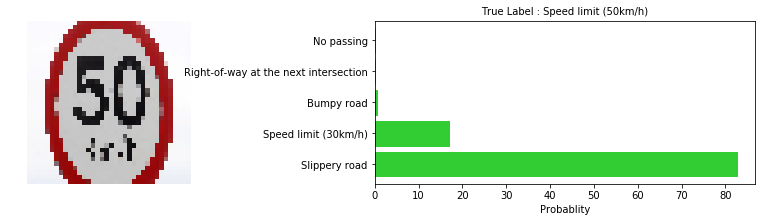

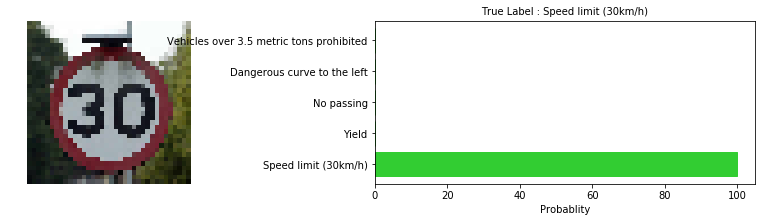

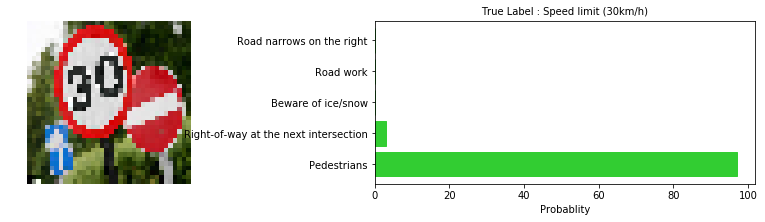

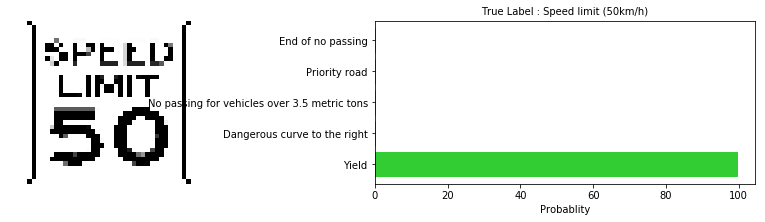

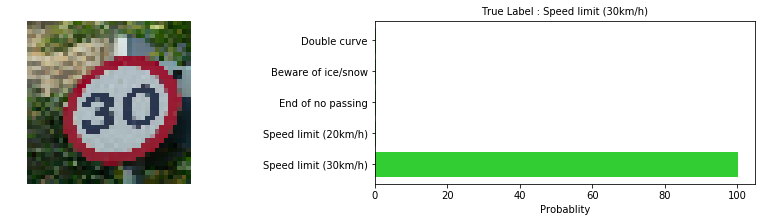

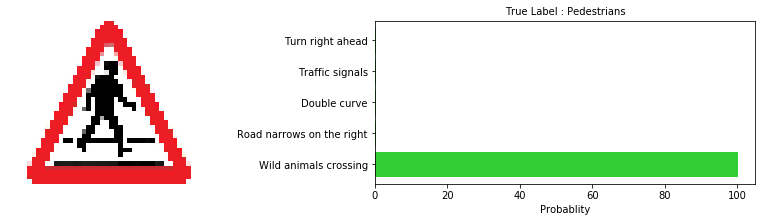

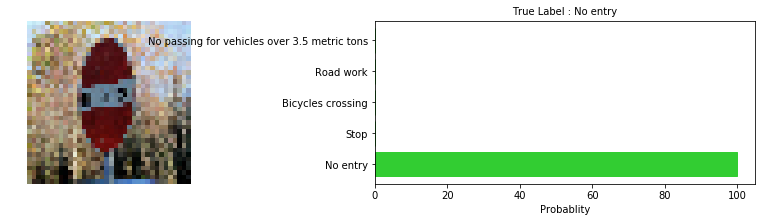

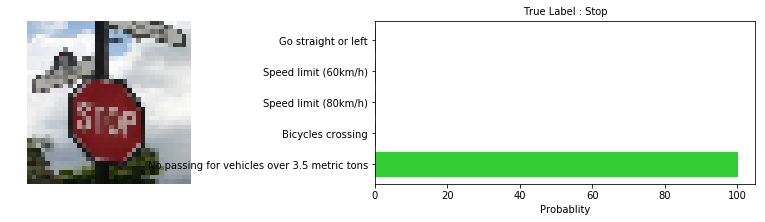

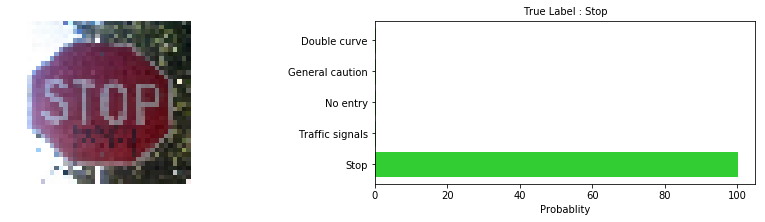

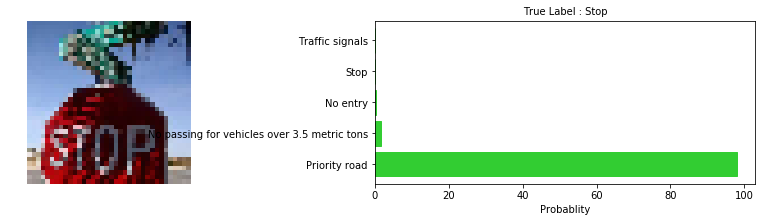

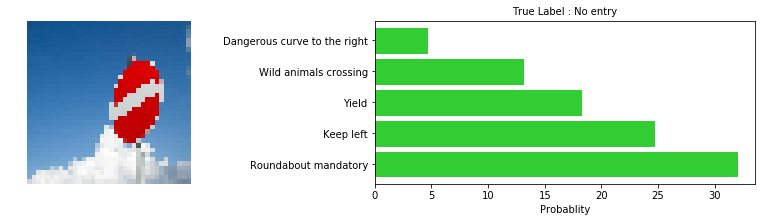

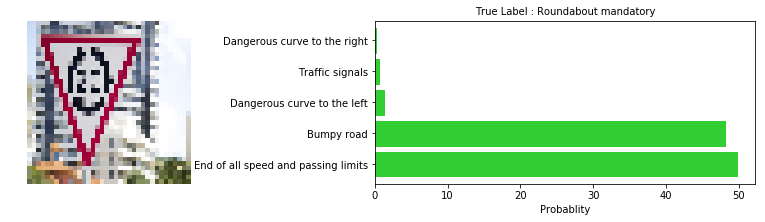

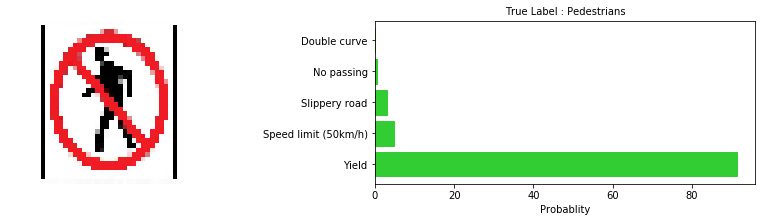

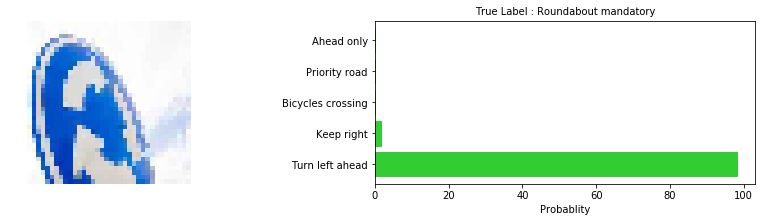

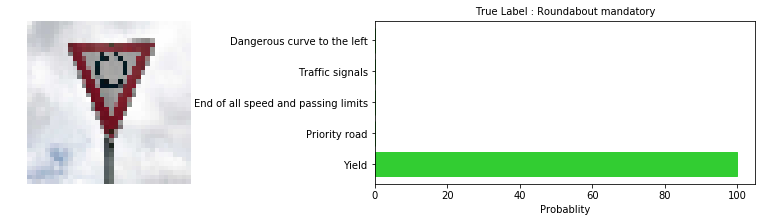

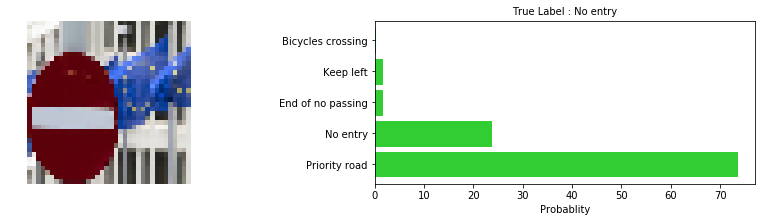

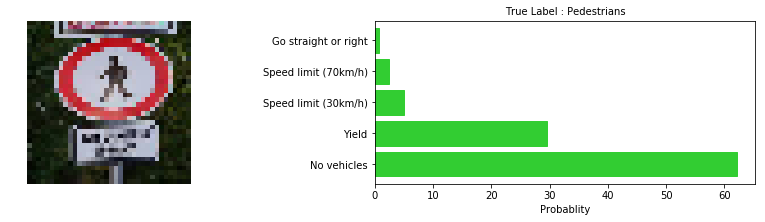

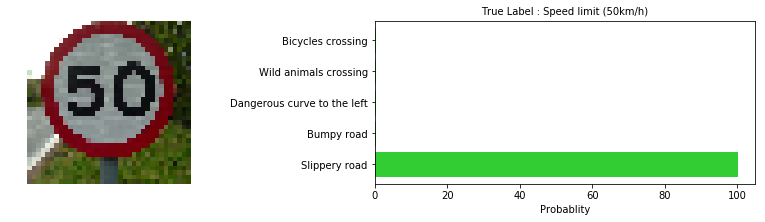

In [40]:
#Define X axis to 5 range
x = np.arange(1,6)

for i in range(len(image_list)):
    fig, ax = plt.subplots(1,2, figsize = (15, 3))
    ax[0].imshow(image_list[i].squeeze())
    ax[0].axis("off")
    ax[1].barh(x, top_k_predict[0][i]*100, height=0.8, color='limegreen', edgecolor='limegreen')
    plt.yticks(np.arange(1,6), sign_names[top_k_predict[1][i]], fontsize = 10, ha = 'right')
    ax[1].set_xlabel('Probablity')
    ax[1].set_title('True Label : '+str(sign_names[image_list_y[i]]), fontsize = 10)
    

In [41]:
print(new_X_test.shape, new_y_test.shape)

(18, 36, 36, 3) (18,)


### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**
   * Already done above.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.